In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2 as cv
import random
import time
import shutil

from constants import *
from visualisation import *
from character_classes import *
from build_dataset import *
from FacialDetector import *

In [1]:
# print_square_info()
# get_avg_variance()
# build_all_square_positives()

# build_negatives()

In [2]:
#init params

params: Parameters = Parameters(ALL_DESCRIPTORS_WIDTH, ALL_DESCRIPTORS_HEIGHT, ALL_DESCRIPTORS, BIG_SET_DIR)
params.number_negative_examples = len(os.listdir(NEGATIVE_DIR))  # numarul exemplelor negative

# e foarte mare 4.5
params.threshold = 2 # toate ferestrele cu scorul > threshold si maxime locale devin detectii
params.has_annotations = True

params.use_hard_mining = False  # (optional)antrenare cu exemple puternic negative
params.use_flip_images = True  # adauga imaginile cu fete oglindite

if params.use_flip_images:
    params.number_positive_examples = [v * 2 for v in params.number_positive_examples]

all_facial_detector: FacialDetector = FacialDetector(params)

directory ../saved_files exists 


In [5]:
# Pasii 1+2+3. Incarcam exemplele pozitive (cropate) si exemple negative generate
# verificam daca sunt deja existente

positive_features = []

for i in range(len(params.descriptors)):
    positive_features_path = os.path.join(params.dir_save_files, 'all_positive_descriptors_' + 
                            str(params.hog_cell_widths[i]) + 'X' + str(params.hog_cell_heights[i]) + '_' +
                            str(params.number_positive_examples) + '.npy')

    if os.path.exists(positive_features_path):
        positive_features.append(np.load(positive_features_path))
        print('loaded positive example features')
    else:
        print('building positive features')
        positive_features.append(all_facial_detector.get_positive_descriptors(i))
        np.save(positive_features_path, positive_features[i])
        print('saved positive descriptors in %s' % positive_features_path)


loaded positive example features
loaded positive example features
loaded positive example features
loaded positive example features
loaded positive example features
loaded positive example features
[[0.00969496 0.         0.         ... 0.         0.         0.        ]
 [0.32436963 0.         0.09999132 ... 0.         0.         0.12551261]
 [0.30137375 0.07672881 0.01484701 ... 0.00258436 0.         0.        ]
 ...
 [0.0096157  0.         0.00906577 ... 0.23504969 0.         0.2529161 ]
 [0.38050723 0.         0.         ... 0.         0.         0.        ]
 [0.31350747 0.         0.16574821 ... 0.         0.232222   0.24504922]]
[[0.27106778 0.0715798  0.27106778 ... 0.08817608 0.06812674 0.24006169]
 [0.30726676 0.27445384 0.04702326 ... 0.24666678 0.30044789 0.        ]
 [0.00705488 0.00315504 0.00399084 ... 0.32027017 0.26763573 0.15771091]
 ...
 [0.25004582 0.02621253 0.13367997 ... 0.01207897 0.         0.00596538]
 [0.08880134 0.         0.04818553 ... 0.01192963 0.02266979 

In [5]:
# negative examples
negative_features_path = os.path.join(params.dir_save_files, 'negative_descriptors_' + 
                        str(params.hog_cell_width) + 'X' + str(params.hog_cell_height) + '_' + 
                        str(params.number_negative_examples) + '.npy')
if os.path.exists(negative_features_path):
    negative_features = np.load(negative_features_path)
    print('loaded negative example features')
else:
    print('building negative example features')
    negative_features = facial_detector_6x6.get_negative_descriptors()
    np.save(negative_features_path, negative_features)
    print('saved descriptors in %s' % negative_features_path)

loaded negative example features


In [6]:
# Pasul 4. Invatam clasificatorul liniar
training_examples = np.concatenate((np.squeeze(positive_features), np.squeeze(negative_features)), axis=0)
train_labels = np.concatenate((np.ones(params.number_positive_examples), np.zeros(negative_features.shape[0])))
facial_detector_6x6.train_classifier(training_examples, train_labels)

Procesam imaginea de testare 0/20..
[] []
Timpul de procesarea al imaginii de testare 0/20 este 0.309557 sec.
Procesam imaginea de testare 1/20..
[] []
Timpul de procesarea al imaginii de testare 1/20 este 0.315609 sec.
Procesam imaginea de testare 2/20..
[] []
Timpul de procesarea al imaginii de testare 2/20 este 0.317115 sec.
Procesam imaginea de testare 3/20..
[] []
Timpul de procesarea al imaginii de testare 3/20 este 0.304064 sec.
Procesam imaginea de testare 4/20..
[] []
Timpul de procesarea al imaginii de testare 4/20 este 0.310498 sec.
Procesam imaginea de testare 5/20..
[] []
Timpul de procesarea al imaginii de testare 5/20 este 0.303999 sec.
Procesam imaginea de testare 6/20..
[] []
Timpul de procesarea al imaginii de testare 6/20 este 0.310777 sec.
Procesam imaginea de testare 7/20..
[] []
Timpul de procesarea al imaginii de testare 7/20 este 0.309035 sec.
Procesam imaginea de testare 8/20..
[] []
Timpul de procesarea al imaginii de testare 8/20 este 0.307847 sec.
Procesam i

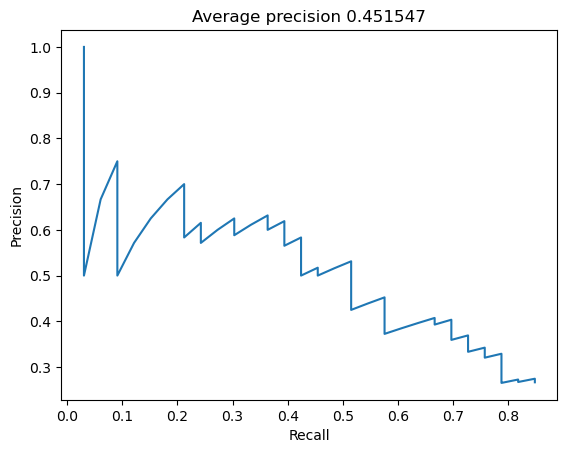

In [7]:

detections, scores, file_names = facial_detector_6x6.run()

# pt vizualizare
if params.has_annotations:
    facial_detector_6x6.eval_detections(detections, scores, file_names)
    show_detections_with_ground_truth(detections, scores, file_names, params)
else:
    show_detections_without_ground_truth(detections, scores, file_names, params)